# Preparation

Inisiasi library yang akan dipakai

In [1]:
%matplotlib inline

import pandas as pd
import spotipy
import spotipy.util as util
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
from tqdm import *

Minta access token dari Spotify

In [2]:
client_id='9ddb0fc5160e4844a7eb0e12d56eebeb'
client_secret='16cc5e6cf72444ff98666ced86ca8860'

token = spotipy.oauth2.SpotifyClientCredentials(client_id=client_id,
                                                client_secret=client_secret)

In [3]:
token = token.get_access_token()

Cek token key, apakah berhasil didapat.

In [4]:
token

'BQAH4BT8HtmitncCSR93f9C_PlCOYJmT_gHQWCgHXYh5QdadCdeLVvgsaebwYp3myZ5Ruyh6TaX3i6FO2TCoRA'

# Getting Audio Data From Spotify

## Mencari Nama Musisi

Misal, kita akan mencari artis dengan nama The Script.

Pertama, inisiasi session menggunakan token key yang sudah kita dapat sebelumnya.

In [5]:
sp = spotipy.Spotify(auth=token)

In [6]:
artist_name="The National"
results = sp.search(q='artist:' + artist_name, type='artist')
items = results['artists']['items']

In [7]:
print(items[0]['name'])
print(items[0]['uri'])

The National
spotify:artist:2cCUtGK9sDU2EoElnk0GNB


Kita simpan uri musisi yang kita cari sebelumnya.

In [8]:
artist_uri=items[0]['uri']

## Mengambil Data Album

Selanjutnya, kita akan mengambil data album untuk yang telah dikeluarkan oleh Five For Fighting

In [9]:
albums_api = sp.artist_albums(artist_uri, album_type='album', country='US', limit=20, offset=0)['items']

Cek isi dari albums_api

In [10]:
albums_api

[{'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2cCUtGK9sDU2EoElnk0GNB'},
    'href': 'https://api.spotify.com/v1/artists/2cCUtGK9sDU2EoElnk0GNB',
    'id': '2cCUtGK9sDU2EoElnk0GNB',
    'name': 'The National',
    'type': 'artist',
    'uri': 'spotify:artist:2cCUtGK9sDU2EoElnk0GNB'}],
  'available_markets': ['AD',
   'AR',
   'AT',
   'AU',
   'BE',
   'BG',
   'BO',
   'BR',
   'CA',
   'CH',
   'CL',
   'CO',
   'CR',
   'CY',
   'CZ',
   'DE',
   'DK',
   'DO',
   'EC',
   'EE',
   'ES',
   'FI',
   'FR',
   'GB',
   'GR',
   'GT',
   'HK',
   'HN',
   'HU',
   'ID',
   'IE',
   'IS',
   'IT',
   'JP',
   'LI',
   'LT',
   'LU',
   'LV',
   'MC',
   'MT',
   'MX',
   'MY',
   'NI',
   'NL',
   'NO',
   'NZ',
   'PA',
   'PE',
   'PH',
   'PL',
   'PT',
   'PY',
   'SE',
   'SG',
   'SK',
   'SV',
   'TR',
   'TW',
   'US',
   'UY'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2JhR4tjuc3MIKa8v2JaKze'},
  'href'

Karena terlalu banyak variabel yang memusingkan, kita coba cek jumlah album dengan len().

In [11]:
len(albums_api)

9

Cek nama album apa saja yang dikeluarkan oleh musisi yang kita analisis.

In [12]:
for i in reversed(range(0,len(albums_api))):
    print(albums_api[i]['name'])

The National
Sad Songs for Dirty Lovers
Cherry Tree
Alligator
Boxer
The Virginia EP
High Violet
High Violet (Expanded Edition)
Trouble Will Find Me


Sekarang, akan kita buat dataframe album yang sudah kita dapat.

In [13]:
album_uri = [albums_api[i]['uri'] for i in reversed(range(0,len(albums_api)))]
album_name= [albums_api[i]['name'] for i in reversed(range(0,len(albums_api)))]
album_img = [albums_api[i]['images'][1]['url'] for i in reversed(range(0,len(albums_api)))]

album_info = pd.DataFrame(
    {'album_name': album_name,
     'album_uri': album_uri,
     'album_img': album_img
    })

album_info

,album_img,album_name,album_uri
0,https://i.scdn.co/image/7b5733728159aa90123483...,The National,spotify:album:4mr0nXLuoWv0AleieUrRkR
1,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,Sad Songs for Dirty Lovers,spotify:album:5MXOch8nt9sOQ5mvUtCWB6
2,https://i.scdn.co/image/58054f19fb566c89d5a904...,Cherry Tree,spotify:album:12G4rtxl2ZFl1BVsKUomB9
3,https://i.scdn.co/image/0ecf9c2e5780ec8feb5e4a...,Alligator,spotify:album:4rwdrCccOqPlRjFZq0H1M1
4,https://i.scdn.co/image/70f190de55b59593b416c7...,Boxer,spotify:album:3hvjTC9OSOrf6SFQmfqLNX
5,https://i.scdn.co/image/b1c1454f0defbcfe054560...,The Virginia EP,spotify:album:25oJU1POWEkvmQrlvb3iwy
6,https://i.scdn.co/image/9e4585b150f029e151f761...,High Violet,spotify:album:59gXPxZ8CwFaeknPxtxXHZ
7,https://i.scdn.co/image/96f2245cf6ade4df346671...,High Violet (Expanded Edition),spotify:album:36VJqCEgUg3nj0Eyxtc1av
8,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,Trouble Will Find Me,spotify:album:2JhR4tjuc3MIKa8v2JaKze


In [14]:
album_info.drop(album_info.index[[2,5,7]], inplace=True)
album_info = album_info.reset_index(drop=True)
album_info

,album_img,album_name,album_uri
0,https://i.scdn.co/image/7b5733728159aa90123483...,The National,spotify:album:4mr0nXLuoWv0AleieUrRkR
1,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,Sad Songs for Dirty Lovers,spotify:album:5MXOch8nt9sOQ5mvUtCWB6
2,https://i.scdn.co/image/0ecf9c2e5780ec8feb5e4a...,Alligator,spotify:album:4rwdrCccOqPlRjFZq0H1M1
3,https://i.scdn.co/image/70f190de55b59593b416c7...,Boxer,spotify:album:3hvjTC9OSOrf6SFQmfqLNX
4,https://i.scdn.co/image/9e4585b150f029e151f761...,High Violet,spotify:album:59gXPxZ8CwFaeknPxtxXHZ
5,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,Trouble Will Find Me,spotify:album:2JhR4tjuc3MIKa8v2JaKze


## Mengambil Data Track dan Audio Features

Setelah mendapatkan data album, selanjutnya akan digunakan untuk mencari track per album.

In [15]:
for i in tqdm(range(len(album_info))):
    temp=pd.DataFrame(sp.album_tracks(album_info['album_uri'][i])['items'])
    temp=temp.ix[:,['track_number','name','duration_ms','uri','preview_url']]
    temp['album_name']=[album_info['album_name'][i]]*len(temp)
    temp['album_img']=[album_info['album_img'][i]]*len(temp)
    temp['album_uri']=[album_info['album_uri'][i]]*len(temp)
    if i==0:
        track_df=temp
    else:
        track_df=pd.concat([track_df, temp], ignore_index=True)

100%|█████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.03s/it]


Cek data track yang telah diambil.

In [16]:
track_df.head()

,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri
0,1,Beautiful Head,188400,spotify:track:2GQ1yZonzJ3OvwtGwtalQo,https://p.scdn.co/mp3-preview/7f41544d48fea43d...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR
1,2,Cold Girl Fever,246000,spotify:track:71BVQ0mO9JSb6eS1D7Kdm0,https://p.scdn.co/mp3-preview/9bd0221fb2391c96...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR
2,3,The Perfect Song,195200,spotify:track:5g56mUgUJzZyXA3QrCMFIk,https://p.scdn.co/mp3-preview/4468ccc1a9d382dd...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR
3,4,American Mary,242893,spotify:track:5Vny8RTpHn1tCoFdSAblJK,https://p.scdn.co/mp3-preview/b2ccf39480421e60...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR
4,5,Son,319733,spotify:track:3ycdZ665myY1HtOa2O3e1a,https://p.scdn.co/mp3-preview/fde027c42baf8f3c...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR


Sekarang, kita cek berapa banyak lagu ada dalam track_df.

In [17]:
len(track_df)

73

Kemudian kita akan coba memasukkan indeks valence dari Spotify.

In [18]:
valence=[sp.audio_features(track_df['uri'][i])[0]['valence'] for i in tqdm(range(len(track_df)))]
track_df['valence']=valence

100%|███████████████████████████████████████████████████████████| 73/73 [01:18<00:00,  1.05s/it]


In [19]:
track_df

,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri,valence
0,1,Beautiful Head,188400,spotify:track:2GQ1yZonzJ3OvwtGwtalQo,https://p.scdn.co/mp3-preview/7f41544d48fea43d...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.5790
1,2,Cold Girl Fever,246000,spotify:track:71BVQ0mO9JSb6eS1D7Kdm0,https://p.scdn.co/mp3-preview/9bd0221fb2391c96...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.5870
2,3,The Perfect Song,195200,spotify:track:5g56mUgUJzZyXA3QrCMFIk,https://p.scdn.co/mp3-preview/4468ccc1a9d382dd...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.4720
3,4,American Mary,242893,spotify:track:5Vny8RTpHn1tCoFdSAblJK,https://p.scdn.co/mp3-preview/b2ccf39480421e60...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.3400
4,5,Son,319733,spotify:track:3ycdZ665myY1HtOa2O3e1a,https://p.scdn.co/mp3-preview/fde027c42baf8f3c...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.3160
5,6,Pay For Me,202640,spotify:track:5tf8adH7TPOPi2PUYy0JhN,https://p.scdn.co/mp3-preview/324af788c54da69c...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.3720
6,7,Bitters & Absolut,240026,spotify:track:1FVEd8Xj4Px94EYzTCJu5Y,https://p.scdn.co/mp3-preview/eedcfc063f575501...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.3510
7,8,John's Star,184866,spotify:track:048l4Jra9KOOaChJ37xhbd,https://p.scdn.co/mp3-preview/2236ad3cf77373cc...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.7770
8,9,Watching You Well,182440,spotify:track:5OClzWpstrjUmhHZqWizUu,https://p.scdn.co/mp3-preview/74b2043cad8e2724...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.2860
9,10,Theory of the Crows,276600,spotify:track:04ZsnIwD3NgRLAYnfgMJXZ,https://p.scdn.co/mp3-preview/31479e2d6caef224...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.1700


Kita lihat 5 lagu dengan nilai <i>valence</i> terkecil.

In [20]:
new_track_df = track_df.sort_values('valence')

In [21]:
new_track_df.head()

,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri,valence
31,8,Val Jester,180653,spotify:track:6lvQMMJKBPRx4JmSYyHJNs,https://p.scdn.co/mp3-preview/c6cc39d772c79a07...,Alligator,https://i.scdn.co/image/0ecf9c2e5780ec8feb5e4a...,spotify:album:4rwdrCccOqPlRjFZq0H1M1,0.0656
10,11,29 Years,170493,spotify:track:62A4OfzGcHffgrXnSiwgDT,https://p.scdn.co/mp3-preview/5e400d9b312b0bb3...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.0861
72,13,Hard To Find,253454,spotify:track:0YWGfHR36uvQwbOUvMhJuz,https://p.scdn.co/mp3-preview/b2f1a519cc677cc7...,Trouble Will Find Me,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,spotify:album:2JhR4tjuc3MIKa8v2JaKze,0.1000
69,10,I Need My Girl,245240,spotify:track:7rbCL7W893Zonbfnevku5s,https://p.scdn.co/mp3-preview/08125363e5f2ac57...,Trouble Will Find Me,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,spotify:album:2JhR4tjuc3MIKa8v2JaKze,0.1040
14,3,90-Mile Water Wall,224360,spotify:track:7rI8NaGdlHTXh68RRwJEx6,https://p.scdn.co/mp3-preview/0a9085cd40ffe478...,Sad Songs for Dirty Lovers,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,spotify:album:5MXOch8nt9sOQ5mvUtCWB6,0.1070


In [22]:
new_track_df['preview_url'][31]

'https://p.scdn.co/mp3-preview/c6cc39d772c79a076ee5b46ae577386fb5d53d4b?cid=9ddb0fc5160e4844a7eb0e12d56eebeb'

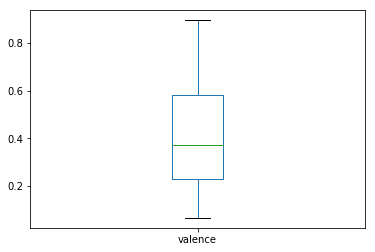

In [23]:
track_df['valence'].plot.box()

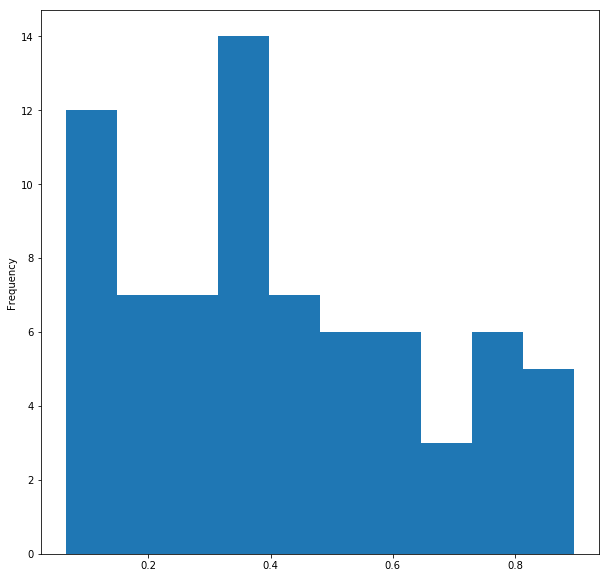

In [24]:
plt.figure(figsize=(10,10));

track_df['valence'].plot.hist()

Kita lanjutkan dengan mengambil data lirik.

# Getting Lyrics Data From A-Z Lyrics

Untuk memperkuat analisis, kita akan menggunakan data lirik dari A-Z Lyrics

In [25]:
from bs4 import BeautifulSoup
from urllib.request  import urlopen
import re
import string
import time
import random

In [26]:
exclude = set(string.punctuation)
artist_lyrics = []

In [27]:
track_name = track_df['name'][0]
track_name = track_name.replace(" ","")
track_name = ''.join(ch for ch in track_name if ch not in exclude)
track_name = track_name.lower()
section_url = "http://www.azlyrics.com/lyrics/" + "national/" + track_name + ".html"
print(section_url)

http://www.azlyrics.com/lyrics/national/beautifulhead.html


In [28]:
"""
for i in tqdm(range(len(track_df)):
    track_name = track_df['name'][i] 
    track_name = track_name.replace(" ","")
    track_name = ''.join(ch for ch in track_name if ch not in exclude)
    track_name = track_name.lower()
    section_url = "http://www.azlyrics.com/lyrics/" + "national/" + track_name + ".html"
    html = urlopen(section_url).read()
    soup = BeautifulSoup(html,"lxml")
    lyrics_regex = re.sub("(\n|\r)","",str(soup))
    lyrics = re.search("<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->(.*)<!-- MxM banner -->",
                       lyrics_regex)
    lyrics_1 = lyrics.group(1)
    lyrics_1 = re.sub("\s{2,}"," ",lyrics_1)
    lyrics_1 = re.sub("<(.[^>]*)>"," ",lyrics_1)
    lyrics_1 = re.sub("(\[4x]|\[X4])","",lyrics_1)
    lyrics_1 = re.sub("\s{2,}"," ",lyrics_1)
    lyrics_1 = lyrics_1.lower()
    exclude = set(string.punctuation)
    lyrics_1 = ''.join(ch for ch in lyrics_1 if ch not in exclude)
    artist_lyrics.append(lyrics_1)
    time.sleep(10 + 5 * random.random())
"""

'\nfor i in tqdm(range(len(track_df)):\n    track_name = track_df[\'name\'][i] \n    track_name = track_name.replace(" ","")\n    track_name = \'\'.join(ch for ch in track_name if ch not in exclude)\n    track_name = track_name.lower()\n    section_url = "http://www.azlyrics.com/lyrics/" + "national/" + track_name + ".html"\n    html = urlopen(section_url).read()\n    soup = BeautifulSoup(html,"lxml")\n    lyrics_regex = re.sub("(\n|\r)","",str(soup))\n    lyrics = re.search("<!-- Usage of azlyrics.com content by any third-party lyrics provider is prohibited by our licensing agreement. Sorry about that. -->(.*)<!-- MxM banner -->",\n                       lyrics_regex)\n    lyrics_1 = lyrics.group(1)\n    lyrics_1 = re.sub("\\s{2,}"," ",lyrics_1)\n    lyrics_1 = re.sub("<(.[^>]*)>"," ",lyrics_1)\n    lyrics_1 = re.sub("(\\[4x]|\\[X4])","",lyrics_1)\n    lyrics_1 = re.sub("\\s{2,}"," ",lyrics_1)\n    lyrics_1 = lyrics_1.lower()\n    exclude = set(string.punctuation)\n    lyrics_1 = \'\'

## Alternative

In [29]:
artist_lyrics = pd.read_csv("lyrics.csv",header=0)
track_df['lyrics']=artist_lyrics

In [30]:
track_df.head()

,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri,valence,lyrics
0,1,Beautiful Head,188400,spotify:track:2GQ1yZonzJ3OvwtGwtalQo,https://p.scdn.co/mp3-preview/7f41544d48fea43d...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.579,youre walking taller than you should the air i...
1,2,Cold Girl Fever,246000,spotify:track:71BVQ0mO9JSb6eS1D7Kdm0,https://p.scdn.co/mp3-preview/9bd0221fb2391c96...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.587,bottle eyes glassy blue i watch the rain come ...
2,3,The Perfect Song,195200,spotify:track:5g56mUgUJzZyXA3QrCMFIk,https://p.scdn.co/mp3-preview/4468ccc1a9d382dd...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.472,ten years older than i was what i brought you ...
3,4,American Mary,242893,spotify:track:5Vny8RTpHn1tCoFdSAblJK,https://p.scdn.co/mp3-preview/b2ccf39480421e60...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.340,give my jewels to the army my silverware and j...
4,5,Son,319733,spotify:track:3ycdZ665myY1HtOa2O3e1a,https://p.scdn.co/mp3-preview/fde027c42baf8f3c...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.316,and if you follow me son the window wrap aroun...


# Analysis

## Percentage of Sad Words And Total Words

In [31]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [32]:
sad_words = pd.read_csv("sad_words.csv")

In [33]:
sad_words.head()

,word,sad
0,abandon,True
1,abandoned,True
2,abandonment,True
3,abduction,True
4,abortion,True


In [34]:
pct_sad = []
word_count = []

In [35]:
for i in tqdm(range(len(track_df))):
    pct_sad_temp = 0
    word_count_temp = 0
    sad_word_count = 0
    lyrics = track_df['lyrics'][i]
    word_token = word_tokenize(lyrics)
    word_count_temp = len(word_token)
    counts = Counter(word_token)
    for j in range(len(sad_words)):
        if sad_words['word'][j] in counts.keys():
            sad_word_count += counts.get(sad_words['word'][j])
    pct_sad_temp = sad_word_count / word_count_temp
    pct_sad.append(pct_sad_temp)
    word_count.append(word_count_temp)

100%|███████████████████████████████████████████████████████████| 73/73 [00:01<00:00, 38.33it/s]


In [36]:
track_df['pct_sad'] = pct_sad
track_df['word_count']= word_count

In [37]:
track_df.head()

,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri,valence,lyrics,pct_sad,word_count
0,1,Beautiful Head,188400,spotify:track:2GQ1yZonzJ3OvwtGwtalQo,https://p.scdn.co/mp3-preview/7f41544d48fea43d...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.579,youre walking taller than you should the air i...,0.019108,157
1,2,Cold Girl Fever,246000,spotify:track:71BVQ0mO9JSb6eS1D7Kdm0,https://p.scdn.co/mp3-preview/9bd0221fb2391c96...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.587,bottle eyes glassy blue i watch the rain come ...,0.045802,131
2,3,The Perfect Song,195200,spotify:track:5g56mUgUJzZyXA3QrCMFIk,https://p.scdn.co/mp3-preview/4468ccc1a9d382dd...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.472,ten years older than i was what i brought you ...,0.018957,211
3,4,American Mary,242893,spotify:track:5Vny8RTpHn1tCoFdSAblJK,https://p.scdn.co/mp3-preview/b2ccf39480421e60...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.340,give my jewels to the army my silverware and j...,0.022346,179
4,5,Son,319733,spotify:track:3ycdZ665myY1HtOa2O3e1a,https://p.scdn.co/mp3-preview/fde027c42baf8f3c...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.316,and if you follow me son the window wrap aroun...,0.023392,171


In [38]:
track_df.sort_values('pct_sad',ascending=False)

,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri,valence,lyrics,pct_sad,word_count
50,2,Sorrow,205213,spotify:track:7cHcIOBRdq5M2ZYqpupOV0,https://p.scdn.co/mp3-preview/ff5e1e023a5d02ca...,High Violet,https://i.scdn.co/image/9e4585b150f029e151f761...,spotify:album:59gXPxZ8CwFaeknPxtxXHZ,0.5170,sorrow found me when i was young sorrow waited...,0.116438,146
21,10,Fashion Coat,122666,spotify:track:5Ptu0t3YnytoIkV1CHKiUT,https://p.scdn.co/mp3-preview/6f13d47f05bf079e...,Sad Songs for Dirty Lovers,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,spotify:album:5MXOch8nt9sOQ5mvUtCWB6,0.5970,in a fashion coat i float down my city dont yo...,0.096154,104
49,1,Terrible Love,279760,spotify:track:1bAuiVz7j2Qa78fssoVjKq,https://p.scdn.co/mp3-preview/78da90a7bbaf5f93...,High Violet,https://i.scdn.co/image/9e4585b150f029e151f761...,spotify:album:59gXPxZ8CwFaeknPxtxXHZ,0.3460,its a terrible love that im walking with spide...,0.088785,214
7,8,John's Star,184866,spotify:track:048l4Jra9KOOaChJ37xhbd,https://p.scdn.co/mp3-preview/2236ad3cf77373cc...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.7770,i wanted to show you johns star and lay down w...,0.074074,135
57,9,Conversation 16,258933,spotify:track:3lhcaMmZQAlllPTu1CgMtK,https://p.scdn.co/mp3-preview/a736f388d61ee7a1...,High Violet,https://i.scdn.co/image/9e4585b150f029e151f761...,spotify:album:59gXPxZ8CwFaeknPxtxXHZ,0.5110,i think the kids are in trouble do not know wh...,0.067568,296
44,8,Start A War,196400,spotify:track:155Xd1apPAbslc4WA49wPa,https://p.scdn.co/mp3-preview/5bcb05fce4469eb1...,Boxer,https://i.scdn.co/image/70f190de55b59593b416c7...,spotify:album:3hvjTC9OSOrf6SFQmfqLNX,0.1410,we expected something something better than be...,0.067308,208
8,9,Watching You Well,182440,spotify:track:5OClzWpstrjUmhHZqWizUu,https://p.scdn.co/mp3-preview/74b2043cad8e2724...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.2860,you stand now on yourself a little moon is com...,0.065574,122
59,11,Vanderlyle Crybaby Geeks,252200,spotify:track:3ORyzvDTTOJx9JIGxh2jBF,https://p.scdn.co/mp3-preview/77189031bf04d3f0...,High Violet,https://i.scdn.co/image/9e4585b150f029e151f761...,spotify:album:59gXPxZ8CwFaeknPxtxXHZ,0.3230,leave your home change your name live alone ea...,0.063107,206
27,4,Looking for Astronauts,203160,spotify:track:59MHBAZUOo9TyNzkjiY5L4,https://p.scdn.co/mp3-preview/f002fe2513fd9dc8...,Alligator,https://i.scdn.co/image/0ecf9c2e5780ec8feb5e4a...,spotify:album:4rwdrCccOqPlRjFZq0H1M1,0.8960,were out looking for astronauts looking for as...,0.052117,307
47,11,Ada,243200,spotify:track:4PRUsCNUV70lFhkF1ViOHj,https://p.scdn.co/mp3-preview/c0fe563e3a915496...,Boxer,https://i.scdn.co/image/70f190de55b59593b416c7...,spotify:album:3hvjTC9OSOrf6SFQmfqLNX,0.1460,ada dont talk about reasons why you dont want ...,0.051095,274


## Gloom Index

In [39]:
gloom_index = []

for i in tqdm(range(len(track_df))):
    gloom_index_temp = 0
    lyrical_dens = track_df['word_count'][i] / track_df['duration_ms'][i] * 1000
    valence = track_df['valence'][i]
    pct_sad = track_df['pct_sad'][i]
    gloom_index_temp = ((1-valence)+pct_sad*(1+lyrical_dens))/2
    gloom_index.append(gloom_index_temp)

100%|█████████████████████████████████████████████████████████| 73/73 [00:00<00:00, 6618.62it/s]


In [40]:
max(gloom_index)

0.49879539401535328

In [41]:
gloom_index_new = [(((gloom - min(gloom_index)) * (100 - 0)) / (max(gloom_index) - min(gloom_index))) + 0 for gloom in gloom_index]

In [42]:
gloom_index_new.index(100)

44

In [43]:
track_df['name'][44]

'Start A War'

In [44]:
track_df['gloom_index']=gloom_index_new

In [45]:
new_track_df = track_df.sort_values('gloom_index', ascending=False)

In [46]:
new_track_df = new_track_df.reset_index()

In [47]:
new_track_df

,index,track_number,name,duration_ms,uri,preview_url,album_name,album_img,album_uri,valence,lyrics,pct_sad,word_count,gloom_index
0,44,8,Start A War,196400,spotify:track:155Xd1apPAbslc4WA49wPa,https://p.scdn.co/mp3-preview/5bcb05fce4469eb1...,Boxer,https://i.scdn.co/image/70f190de55b59593b416c7...,spotify:album:3hvjTC9OSOrf6SFQmfqLNX,0.1410,we expected something something better than be...,0.067308,208,100.000000
1,69,10,I Need My Girl,245240,spotify:track:7rbCL7W893Zonbfnevku5s,https://p.scdn.co/mp3-preview/08125363e5f2ac57...,Trouble Will Find Me,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,spotify:album:2JhR4tjuc3MIKa8v2JaKze,0.1040,i am good i am grounded davy says that i look ...,0.046296,216,98.330467
2,47,11,Ada,243200,spotify:track:4PRUsCNUV70lFhkF1ViOHj,https://p.scdn.co/mp3-preview/c0fe563e3a915496...,Boxer,https://i.scdn.co/image/70f190de55b59593b416c7...,spotify:album:3hvjTC9OSOrf6SFQmfqLNX,0.1460,ada dont talk about reasons why you dont want ...,0.051095,274,95.983156
3,10,11,29 Years,170493,spotify:track:62A4OfzGcHffgrXnSiwgDT,https://p.scdn.co/mp3-preview/5e400d9b312b0bb3...,The National,https://i.scdn.co/image/7b5733728159aa90123483...,spotify:album:4mr0nXLuoWv0AleieUrRkR,0.0861,could you tell the enchantment i said goodbye ...,0.017544,171,94.416811
4,12,1,Cardinal Song,378040,spotify:track:1DWVotdec9ASHIxBPNKhcq,https://p.scdn.co/mp3-preview/7dfd52f99eb939c2...,Sad Songs for Dirty Lovers,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,spotify:album:5MXOch8nt9sOQ5mvUtCWB6,0.1150,never look her in the eyes never tell the trut...,0.033175,211,92.996835
5,31,8,Val Jester,180653,spotify:track:6lvQMMJKBPRx4JmSYyHJNs,https://p.scdn.co/mp3-preview/c6cc39d772c79a07...,Alligator,https://i.scdn.co/image/0ecf9c2e5780ec8feb5e4a...,spotify:album:4rwdrCccOqPlRjFZq0H1M1,0.0656,build a fire for val jester build a room for y...,0.000000,120,92.733273
6,72,13,Hard To Find,253454,spotify:track:0YWGfHR36uvQwbOUvMhJuz,https://p.scdn.co/mp3-preview/b2f1a519cc677cc7...,Trouble Will Find Me,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,spotify:album:2JhR4tjuc3MIKa8v2JaKze,0.1000,i can see the glowing lights i can see them ev...,0.011299,177,90.984222
7,68,9,Slipped,265066,spotify:track:3QinothXo6s9uhwCXlI8wp,https://p.scdn.co/mp3-preview/4fa71d2441be8610...,Trouble Will Find Me,https://i.scdn.co/image/3a824e6dda8bf6c43d1ac7...,spotify:album:2JhR4tjuc3MIKa8v2JaKze,0.1520,im in the city you hated my eyes are fallen co...,0.031034,290,90.270999
8,14,3,90-Mile Water Wall,224360,spotify:track:7rI8NaGdlHTXh68RRwJEx6,https://p.scdn.co/mp3-preview/0a9085cd40ffe478...,Sad Songs for Dirty Lovers,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,spotify:album:5MXOch8nt9sOQ5mvUtCWB6,0.1070,well i know that you know that youve become th...,0.010050,199,90.153266
9,23,12,Lucky You,262160,spotify:track:4vj2E6lBenyt89cA1BmRsC,https://p.scdn.co/mp3-preview/f321a2a55bf0318c...,Sad Songs for Dirty Lovers,https://i.scdn.co/image/657a4e91dfe4ae02f6fccc...,spotify:album:5MXOch8nt9sOQ5mvUtCWB6,0.1200,every time you get a drink and every time you ...,0.013072,153,88.857982


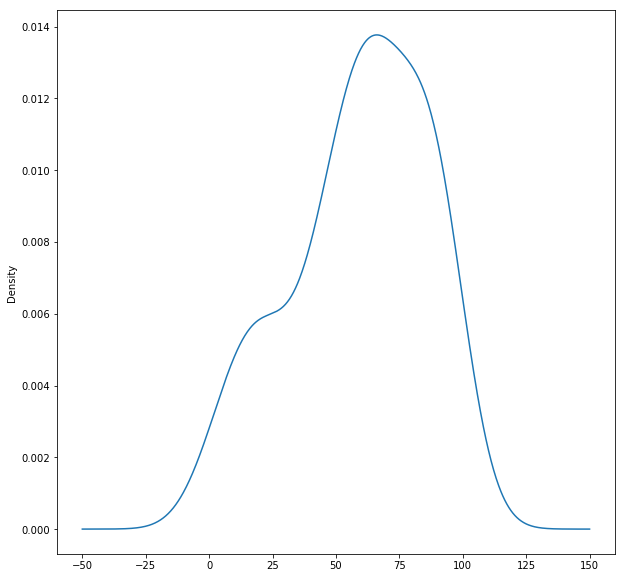

In [48]:
plt.figure(figsize=(10,10));

new_track_df['gloom_index'].plot.density()

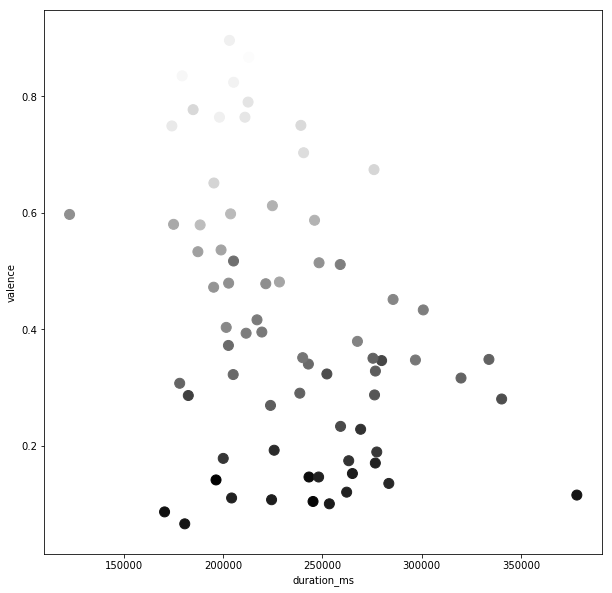

In [49]:
plt.figure()

new_track_df.plot.scatter(y='valence', x='duration_ms', c=new_track_df['gloom_index']*4, s=100, figsize=(10,10), legend=True);

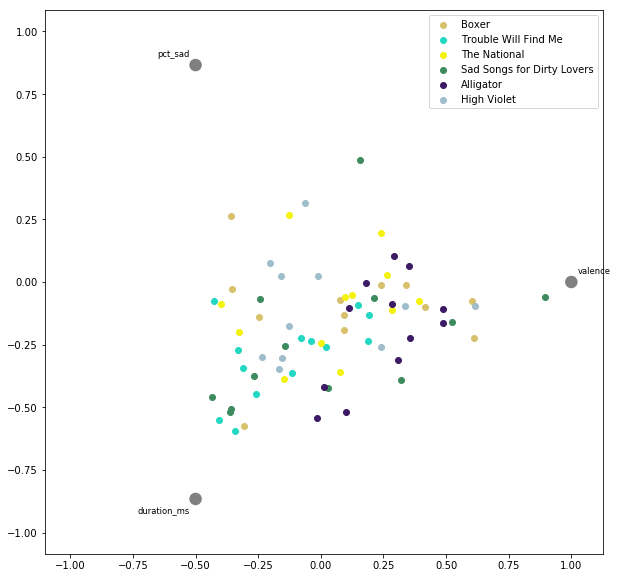

In [50]:
from pandas.tools.plotting import radviz

plt.figure(figsize=(10,10))

radviz(new_track_df[['valence','pct_sad', 'duration_ms','album_name']], 'album_name')

# References